In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel (r'D:\Semester 6\KP\Indonesia Power\BFPT ADP1.xlsx')

In [5]:
df

,Value1,Timestamp1,UnitsAbbreviation1,Good1,Questionable1,Substituted1,Value2,Timestamp2,UnitsAbbreviation2,Good2,...,UnitsAbbreviation27,Good27,Questionable27,Substituted27,Value28,Timestamp28,UnitsAbbreviation28,Good28,Questionable28,Substituted28
0,99.488831,2020-05-18T17:10:00Z,%,True,False,False,30.069073,2020-05-18T17:10:00Z,°C,True,...,rpm,True,False,False,0.033074,2020-05-18T17:10:00Z,MPa1,True,False,False
1,99.488831,2020-05-18T17:20:00Z,%,True,False,False,30.069073,2020-05-18T17:20:00Z,°C,True,...,rpm,True,False,False,0.033077,2020-05-18T17:20:00Z,MPa1,True,False,False
2,99.482307,2020-05-18T17:30:00Z,%,True,False,False,30.069073,2020-05-18T17:30:00Z,°C,True,...,rpm,True,False,False,0.033069,2020-05-18T17:30:00Z,MPa1,True,False,False
3,99.486595,2020-05-18T17:40:00Z,%,True,False,False,30.069073,2020-05-18T17:40:00Z,°C,True,...,rpm,True,False,False,0.033069,2020-05-18T17:40:00Z,MPa1,True,False,False
4,99.482201,2020-05-18T17:50:00Z,%,True,False,False,30.069073,2020-05-18T17:50:00Z,°C,True,...,rpm,True,False,False,0.033055,2020-05-18T17:50:00Z,MPa1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,-0.340180,2020-07-30T16:20:00Z,%,True,False,False,60.619240,2020-07-30T16:20:00Z,°C,True,...,rpm,True,False,False,0.147330,2020-07-30T16:20:00Z,MPa1,True,False,False
10508,-0.338056,2020-07-30T16:30:00Z,%,True,False,False,60.287003,2020-07-30T16:30:00Z,°C,True,...,rpm,True,False,False,0.146901,2020-07-30T16:30:00Z,MPa1,True,False,False
10509,-0.340469,2020-07-30T16:40:00Z,%,True,False,False,60.237198,2020-07-30T16:40:00Z,°C,True,...,rpm,True,False,False,0.147407,2020-07-30T16:40:00Z,MPa1,True,False,False
10510,-0.335051,2020-07-30T16:50:00Z,%,True,False,False,60.109863,2020-07-30T16:50:00Z,°C,True,...,rpm,True,False,False,0.147518,2020-07-30T16:50:00Z,MPa1,True,False,False


Anomaly detection value4 (vibrasi)

In [6]:
data = df[['Value1','Value2','Value3','Value4','Value5','Value6','Value7','Value8','Value9','Value10','Value11','Value12','Value13','Value14','Value15','Value16','Value17','Value18','Value22','Value24','Value25','Value26','Value27','Value28']]


In [7]:
pd.set_option('display.max_columns', data.shape[0]+1)
data

,Value1,Value2,Value3,Value4,Value5,Value6,Value7,Value8,Value9,Value10,Value11,Value12,Value13,Value14,Value15,Value16,Value17,Value18,Value22,Value24,Value25,Value26,Value27,Value28
0,99.488831,30.069073,30.195248,0.664161,0.560235,30.053514,33.982761,30.069073,0.442505,0.747680,29.850327,29.564428,28.555376,30.086250,30.069073,30.069073,30.014605,30.069073,29.816740,0.028154,-0.245677,-0.277867,3000.244141,0.033074
1,99.488831,30.069073,30.195248,0.669323,0.555562,30.067276,33.982761,29.974541,0.442505,0.747680,29.816740,29.564428,28.555376,30.069073,30.069073,30.069073,30.023237,30.069073,29.816740,0.028308,-0.245172,-0.277920,3000.244141,0.033077
2,99.482307,30.069073,30.195248,0.664041,0.673545,29.942905,33.878021,30.059921,0.442505,0.747680,29.816740,29.564428,28.555376,30.069073,30.069073,30.069073,29.942905,30.069073,29.816740,0.028189,-0.244649,-0.277906,3000.244141,0.033069
3,99.486595,30.069073,30.159006,0.668652,0.633241,29.942905,33.856438,29.942905,0.442505,0.747680,29.816740,29.564428,28.555376,30.069073,30.069073,30.069073,29.942905,30.069073,29.816740,0.028359,-0.245624,-0.278022,3000.244141,0.033069
4,99.482201,30.069073,30.078657,0.663611,0.704818,29.942905,33.856438,29.942905,0.442505,0.747680,29.816740,29.564428,28.555376,30.069073,30.069073,30.069073,29.942905,30.069073,29.816740,0.028148,-0.245598,-0.278039,3000.244141,0.033055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,-0.340180,60.619240,63.932087,27.892962,30.226606,47.531467,67.631065,63.167290,18.236200,18.465706,44.315022,52.986790,40.317490,48.542645,50.362240,49.976784,48.923336,40.958500,44.991650,2.246446,0.497767,0.484078,5296.563965,0.147330
10508,-0.338056,60.287003,63.725395,25.375938,29.509382,47.344223,67.631065,63.294743,18.585163,18.168163,44.231220,52.478584,40.178589,48.210136,50.011173,49.607800,48.608021,41.076565,44.907806,2.230790,0.490811,0.471834,5187.334961,0.146901
10509,-0.340469,60.237198,63.592075,24.619781,28.841261,47.206944,67.631065,63.250343,16.842663,17.418995,44.052540,52.052361,40.052025,48.035126,49.882637,49.304073,48.345570,41.064671,44.738152,2.230489,0.482735,0.463152,5143.539551,0.147407
10510,-0.335051,60.109863,63.636215,22.936934,26.495438,47.153439,67.631065,63.198898,18.426256,19.165964,43.977783,50.792164,39.925465,47.908257,49.938732,49.198128,48.288876,41.064671,44.738152,2.231413,0.483043,0.459245,5154.533203,0.147518


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


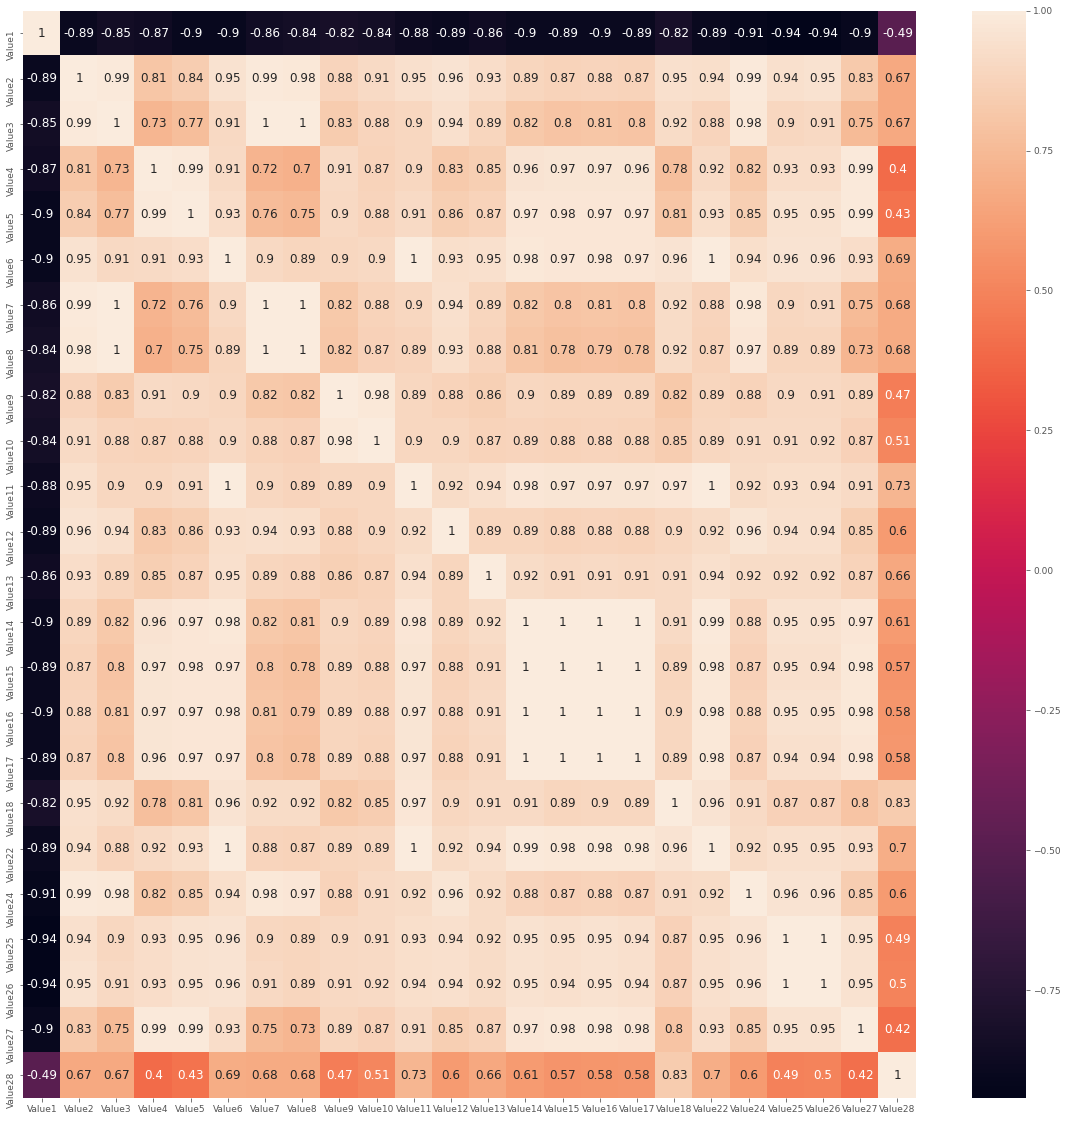

In [8]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(20,20))
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

In [9]:
def find_corr_pairs(corr,thrsh):
    
    """
    find high correlation column pairs in df 
    ======================================
    input: 
    corr - (df)- correlation matrix generated by pandas
    thrsh - (float) threshold value to consider correlation as high so that it is included in the output 
    output:
    high_corr_pairs - (list) list of tuples of the two-column names and their correlation. corr> thrsh
    """
    high_corr_pairs = []
    # same as input 'corr' but the upper -triangle half of the matrix is zeros ( for convenience only) 
    corr_diag = pd.DataFrame(np.tril(corr.values), columns=corr.columns, index = corr.index)

    # check  the correlation between every pair of columns in the corr and keeps the high ones
    for col_num , col in enumerate(corr_diag):
        col_corr=corr_diag[col].iloc[col_num+1:] # this slicing ensures ignoring self_corr and duplicates due to symmetry
        # bool mask for pairs with high corr with col
        mask_pairs = col_corr.apply(lambda x: abs(x))>thrsh 
        idx_pairs=col_corr[mask_pairs].index

        # create list of high corr pairs
        for idx , corr in zip(idx_pairs,col_corr[mask_pairs].values):
            high_corr_pairs.append((col, idx, corr))
    
    return high_corr_pairs

In [10]:
corr_pairs=find_corr_pairs(corrMatrix,0.9)
for c in corr_pairs:
    print(c)

('Value1', 'Value24', -0.9148805103699448)
('Value1', 'Value25', -0.942404239058418)
('Value1', 'Value26', -0.9405367260820297)
('Value2', 'Value3', 0.9893289480687094)
('Value2', 'Value6', 0.9531463565976421)
('Value2', 'Value7', 0.9884535060770855)
('Value2', 'Value8', 0.9842893290529077)
('Value2', 'Value10', 0.9145685060480895)
('Value2', 'Value11', 0.9453503241309169)
('Value2', 'Value12', 0.960907536834875)
('Value2', 'Value13', 0.9282109515542697)
('Value2', 'Value18', 0.9462016316792915)
('Value2', 'Value22', 0.9375944069108441)
('Value2', 'Value24', 0.9893737271441067)
('Value2', 'Value25', 0.9427191335690052)
('Value2', 'Value26', 0.9475620014883744)
('Value3', 'Value6', 0.9051619815262792)
('Value3', 'Value7', 0.9976866084805633)
('Value3', 'Value8', 0.9979835206164339)
('Value3', 'Value12', 0.9420506443662229)
('Value3', 'Value18', 0.9207279757046358)
('Value3', 'Value24', 0.9787183509152023)
('Value3', 'Value26', 0.9057285533710588)
('Value4', 'Value5', 0.9903574812589137)

In [11]:
data1 = df[['Value1','Value2','Value4','Value28']]


Text(0.5, 1.0, 'Value28')

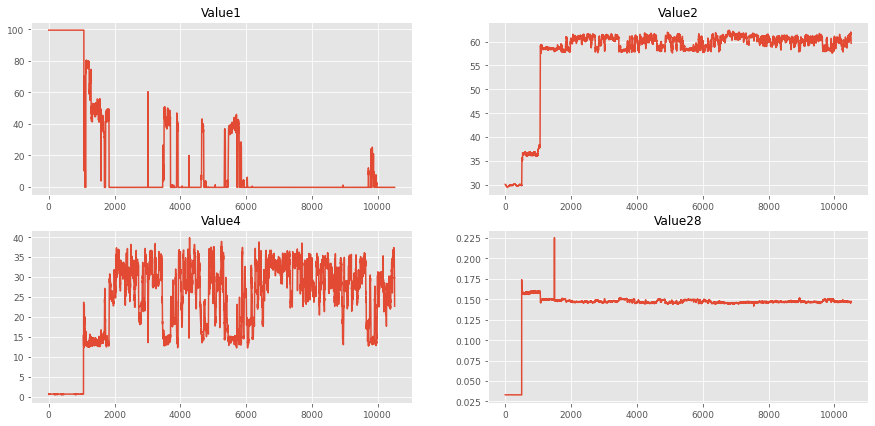

In [12]:
fig = plt.figure(figsize=(15,7))

ax1 = plt.subplot2grid((2,2), (0,0),)
ax2 = plt.subplot2grid((2,2), (0,1),)
ax3 = plt.subplot2grid((2,2), (1,0),)
ax4 = plt.subplot2grid((2,2), (1,1),)

ax1.plot(data1["Value1"])
ax1.set_title("Value1")
ax2.plot(data1["Value2"])
ax2.set_title("Value2")
ax3.plot(data1["Value4"])
ax3.set_title("Value4")
ax4.plot(data1["Value28"])
ax4.set_title("Value28")

In [13]:
data1_split = np.array_split(data1, [2000,10511])
dataset_train = data1_split[1]
dataset_test = data1

In [14]:
#dataset_train = dataset_train.sort_index(ascending=False)
#dataset_train = dataset_train.reset_index()
#dataset_train = dataset_train.tail(len(df)-1)
#dataset_train = dataset_train.drop(['index'], axis=1)

In [15]:
dataset_train

,Value1,Value2,Value4,Value28
2000,-0.353081,60.577538,29.928743,0.147143
2001,-0.353914,60.493267,30.044275,0.147153
2002,-0.350785,60.491886,29.726435,0.147376
2003,-0.354669,60.109863,28.399734,0.147457
2004,-0.350410,59.948128,27.917702,0.147870
...,...,...,...,...
10506,-0.334491,60.746597,29.970791,0.146879
10507,-0.340180,60.619240,27.892962,0.147330
10508,-0.338056,60.287003,25.375938,0.146901
10509,-0.340469,60.237198,24.619781,0.147407


In [16]:
dataset_test

,Value1,Value2,Value4,Value28
0,99.488831,30.069073,0.664161,0.033074
1,99.488831,30.069073,0.669323,0.033077
2,99.482307,30.069073,0.664041,0.033069
3,99.486595,30.069073,0.668652,0.033069
4,99.482201,30.069073,0.663611,0.033055
...,...,...,...,...
10507,-0.340180,60.619240,27.892962,0.147330
10508,-0.338056,60.287003,25.375938,0.146901
10509,-0.340469,60.237198,24.619781,0.147407
10510,-0.335051,60.109863,22.936934,0.147518


# 1. PCA + Mahalanobis

In [17]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()



X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                             columns=dataset_train.columns, 
                             index=dataset_train.index)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                              columns=dataset_test.columns, 
                              index=dataset_test.index)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [19]:
X_train_PCA.head()

,0,1
2000,-0.141797,-0.000425
2001,-0.134050,-0.004747
2002,-0.119189,-0.007399
2003,-0.038864,-0.041049
2004,0.005389,-0.054954


In [20]:
X_train_PCA.values

array([[-0.14179737, -0.00042507],
       [-0.13405023, -0.00474696],
       [-0.11918919, -0.0073992 ],
       ...,
       [-0.00599073, -0.05231203],
       [ 0.03412638, -0.06160642],
       [ 0.09312964, -0.08219833]])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


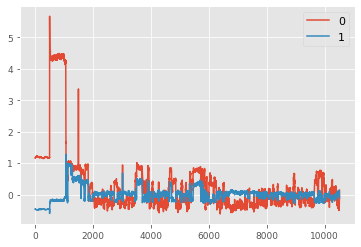

In [21]:
X_test_PCA.plot()

In [22]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [23]:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [24]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 4. if extreme else 3.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [25]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 4. if extreme else 3.
    threshold = np.mean(dist) * k
    return threshold

In [26]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [27]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

mean_distr = data_train.mean(axis=0)

dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

In [28]:
data_train

array([[-0.14179737, -0.00042507],
       [-0.13405023, -0.00474696],
       [-0.11918919, -0.0073992 ],
       ...,
       [-0.00599073, -0.05231203],
       [ 0.03412638, -0.06160642],
       [ 0.09312964, -0.08219833]])

(0.0, 15.0)

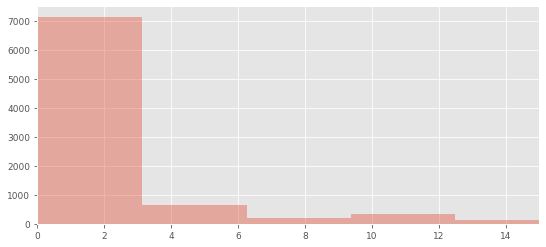

In [30]:
plt.figure(figsize=(9,4))
sn.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

Text(0.5, 0, 'Mahalanobis dist')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


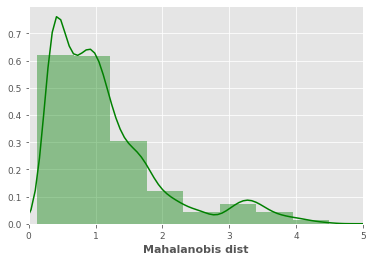

In [33]:
plt.figure()
sn.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [34]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.tail()

,Mob dist,Thresh,Anomaly
10507,0.273898,4.567789,False
10508,0.381278,4.567789,False
10509,0.458475,4.567789,False
10510,0.651916,4.567789,False
10511,0.906625,4.567789,False


In [35]:
anomaly_alldata = pd.concat([anomaly])

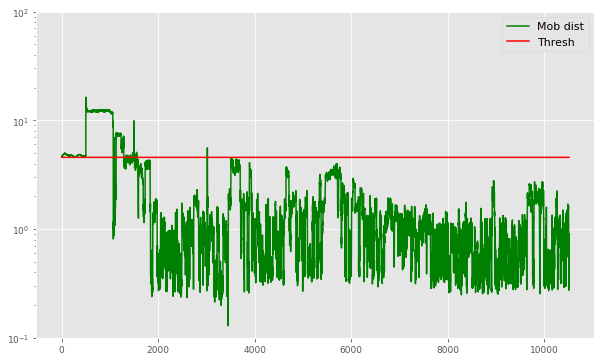

In [36]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e2], color = ['green','red'])

# Autoencoder : Anomaly Detection

In [37]:
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(1234)

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

seed(10)

act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10

Using TensorFlow backend.


In [51]:
X_train.shape[1]

4

In [38]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 8085 samples, validate on 426 samples
Epoch 1/100
8085/8085 [==============================] - 3s 368us/step - loss: 0.0203 - val_loss: 0.0040
Epoch 2/100
8085/8085 [==============================] - 2s 217us/step - loss: 0.0056 - val_loss: 0.0028
Epoch 3/100
8085/8085 [==============================] - 2s 244us/step - loss: 0.0026 - val_loss: 9.9485e-04
Epoch 4/100
8085/8085 [==============================] - 2s 224us/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/100
8085/8085 [==============================] - 2s 249us/step - loss: 0.0013 - val_loss: 8.9357e-04
Epoch 6/100
8085/8085 [==============================] - 2s 270us/step - loss: 0.0013 - val_loss: 8.7419e-04
Epoch 7/100
8085/8085 [==============================] - 2s 232us/step - loss: 0.0012 - val_loss: 9.4620e-04
Epoch 8/100
8085/8085 [==============================] - 2s 224us/step - loss: 0.0012 - val_loss: 8.1536e-04
Epoch 9/100
8085/8085 [==============================] - 2s 235us/step - loss: 0.0012 - val_l

Epoch 74/100
8085/8085 [==============================] - 2s 190us/step - loss: 8.5667e-04 - val_loss: 5.6557e-04
Epoch 75/100
8085/8085 [==============================] - 2s 206us/step - loss: 8.4446e-04 - val_loss: 7.8870e-04
Epoch 76/100
8085/8085 [==============================] - 2s 207us/step - loss: 8.4183e-04 - val_loss: 5.4991e-04
Epoch 77/100
8085/8085 [==============================] - 2s 208us/step - loss: 8.3993e-04 - val_loss: 4.9717e-04
Epoch 78/100
8085/8085 [==============================] - 2s 216us/step - loss: 8.3584e-04 - val_loss: 6.5426e-04
Epoch 79/100
8085/8085 [==============================] - 2s 222us/step - loss: 8.3726e-04 - val_loss: 5.0735e-04
Epoch 80/100
8085/8085 [==============================] - 2s 207us/step - loss: 8.2984e-04 - val_loss: 5.7552e-04
Epoch 81/100
8085/8085 [==============================] - 2s 210us/step - loss: 8.2822e-04 - val_loss: 5.3909e-04
Epoch 82/100
8085/8085 [==============================] - 2s 213us/step - loss: 8.2517e-

In [46]:
X_train.shape

(8511, 4)

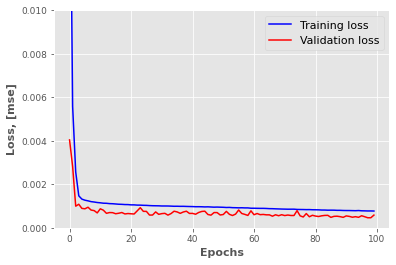

In [39]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.01])
plt.show()

(0.0, 0.1)

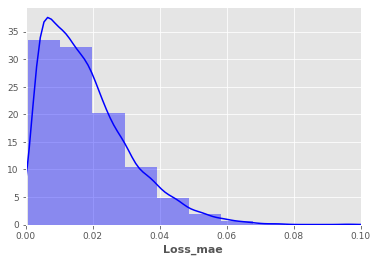

In [41]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sn.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.1])

In [52]:
X_test

,Value1,Value2,Value4,Value28
0,1.643003,-5.685098,-0.418056,-10.358144
1,1.643003,-5.685098,-0.417869,-10.357934
2,1.642896,-5.685098,-0.418060,-10.358679
3,1.642966,-5.685098,-0.417893,-10.358698
4,1.642894,-5.685098,-0.418076,-10.359978
...,...,...,...,...
10507,0.000400,0.631694,0.567244,0.556525
10508,0.000435,0.562998,0.476163,0.515549
10509,0.000395,0.552700,0.448801,0.563835
10510,0.000484,0.526371,0.387905,0.574438


In [54]:
X_test.Value1

0        1.643003
1        1.643003
2        1.642896
3        1.642966
4        1.642894
           ...   
10507    0.000400
10508    0.000435
10509    0.000395
10510    0.000484
10511    0.000416
Name: Value1, Length: 10512, dtype: float64

In [55]:
np.mean(np.abs(X_pred-X_test), axis = 1)

0        4.579752
1        4.579592
2        4.580048
3        4.580003
4        4.580732
           ...   
10507    0.011115
10508    0.020926
10509    0.019092
10510    0.027099
10511    0.019818
Length: 10512, dtype: float64

In [42]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.07
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
0,4.579752,0.07,True
1,4.579592,0.07,True
2,4.580048,0.07,True
3,4.580003,0.07,True
4,4.580732,0.07,True


In [56]:
scored['Threshold'].dtype

dtype('float64')

In [57]:
scored['Loss_mae'].dtype

dtype('float64')

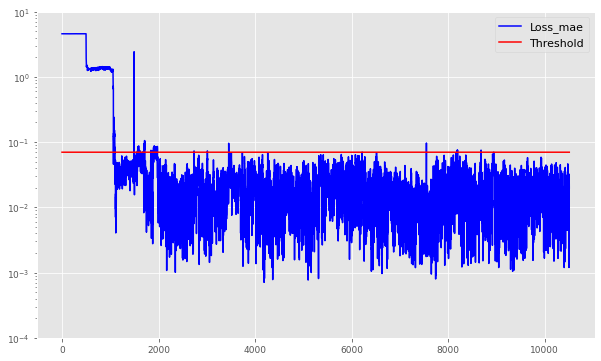

In [43]:
scored.plot(logy=True,  figsize = (10,6), ylim = [1e-4,1e1], color = ['blue','red'])